In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "../mouse_drug_data.csv"
clinical_trial_data_to_load = "../clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv("mouse_drug_data.csv")
mouse_drug_data.head()

clinical_trial_data = pd.read_csv("clinicaltrial_data.csv")
clinical_trial_data.head()
# Combine the data into a single dataset via left merge
merge_data = pd.merge(clinical_trial_data, mouse_drug_data, on="Mouse ID", how="left")

# Display the data table for preview
merge_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
vol_merge_group = merge_data.groupby(["Drug","Timepoint"])
vol_merge_group.head()

avg_tumor_vol = vol_merge_group["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
df_mean = pd.DataFrame(avg_tumor_vol)
df_mean.reset_index(inplace=True)

# Preview DataFrame
df_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
vol_merge_group = merge_data.groupby(["Drug", "Timepoint"])
vol_merge_group.head()

std_error_vol = vol_merge_group["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
df_sem = pd.DataFrame(std_error_vol)
df_sem.reset_index(inplace=True)

# Preview DataFrame
df_sem.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
#Drug: {Placebo, Capomulin, Ceftamin, Infubinol, Ketapril, Naftisol, Propriva, Ramicane, Stelasyn, Zoniferol}
# Preview that Reformatting worked

tumor_vol_pivot_df = df_mean.pivot(index='Timepoint', columns="Drug", values="Tumor Volume (mm3)")
tumor_vol_pivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


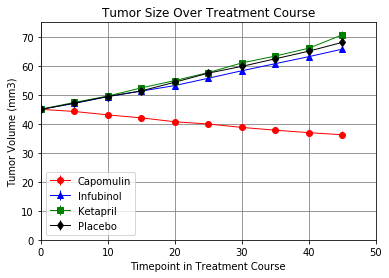

In [5]:
# Generate the Plot (with Error Bars)
drug_format_list = [('Capomulin','o','red'),('Infubinol','^','blue'),
                    ('Ketapril','s','green'),('Placebo','d','black')]
                    
                    
# ,('Propriva','h','magenta'),('Ramicane','X','yellow'),('Stelasyn','P','chartreuse'),('Zoniferol','8','peru')]
for drug,marker,colors in drug_format_list:
    ste = std_error_vol[drug]
    tumor_treatment_plt = plt.errorbar(tumor_vol_pivot_df.index,tumor_vol_pivot_df[drug],ste,
                                       fmt=marker,ls='-',color=colors,linewidth=1.0)
plt.legend([('Capomulin'),('Infubinol'),
        ('Ketapril'),('Placebo')],loc='best')

plt.title('Tumor Size Over Treatment Course')

plt.xlim(0,50)
plt.xlabel("Timepoint in Treatment Course")

plt.ylim(0, 75)
plt.ylabel("Tumor Volume (mm3)")

plt.grid(color="0.50", linestyle="-") 


# Save the Figure
plt.savefig("../Figure 1 Tumor Volume")
plt.show()

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_merge_group = merge_data.groupby(["Drug", "Timepoint"])
meta_merge_group.head()

avg_meta_tumor_sites = meta_merge_group["Metastatic Sites"].mean()

# Convert to DataFrame
df_meta = pd.DataFrame(avg_meta_tumor_sites)
df_meta.reset_index(inplace=True)

# Preview DataFrame
df_meta.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_merge_group = merge_data.groupby(["Drug", "Timepoint"])
meta_merge_group.head()

std_error_meta = meta_merge_group["Metastatic Sites"].sem()

# Convert to DataFrame
df_meta_sem = pd.DataFrame(std_error_meta)
df_meta_sem.reset_index(inplace=True)

# Preview DataFrame
df_meta_sem.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [8]:
# Minor Data Munging to Re-Format the Data Frames
meta_vol_pivot_df = df_meta.pivot(index='Timepoint', columns="Drug", values="Metastatic Sites")

# Preview that Reformatting worked
meta_vol_pivot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


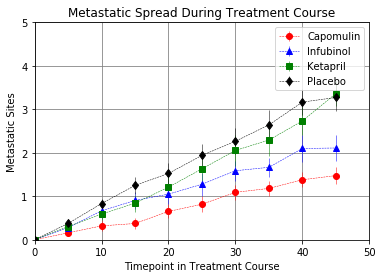

In [9]:
# Generate the Plot (with Error Bars)
drug_format_list = [('Capomulin','o','red'),('Infubinol','^','blue'),
                    ('Ketapril','s','green'),('Placebo','d','black')]

for drug,marker,colors in drug_format_list:
    ste = std_error_meta[drug]
    meta_plt = plt.errorbar(meta_vol_pivot_df.index, meta_vol_pivot_df[drug], ste,
                                       fmt=marker,ls='--',color=colors,linewidth=0.5)

plt.legend([('Capomulin'),('Infubinol'),('Ketapril'),('Placebo')],loc='best')

plt.title('Metastatic Spread During Treatment Course')

plt.xlim(0,50)
plt.xlabel("Timepoint in Treatment Course")

plt.ylim(0.0, 5.0)
plt.ylabel("Metastatic Sites")

plt.grid(color="0.50", linestyle="-") 

# Save the Figure
plt.savefig("../Figure 2 Metastatic Spread")
plt.show()

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_merge_group = merge_data.groupby(["Drug", "Timepoint"])
mice_merge_group.head()

mice_count = mice_merge_group["Mouse ID"].count()

# Convert to DataFrame
df_mice_count = pd.DataFrame(mice_count)
df_mice_count.reset_index(inplace=True)

# Preview DataFrame
df_mice_count.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Minor Data Munging to Re-Format the Data Frames & Preview the Data Frame
mice_count_pivot_df = df_mice_count.pivot(index='Timepoint', columns="Drug", values="Mouse ID")
mice_count_pivot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


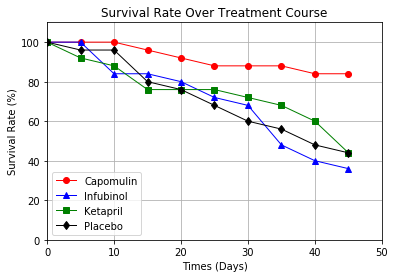

In [12]:
# Generate the Plot (Accounting for percentages)
drug_format_list = [('Capomulin','o','red'),('Infubinol','^','blue'),
                    ('Ketapril','s','green'),('Placebo','d','black')]

for drug,marker,colors in drug_format_list:
    
    total_mouse = mice_count_pivot_df[drug][0]
    survival_rate = (mice_count_pivot_df[drug]/total_mouse)*100
    survival_treatment_plt = plt.plot(mice_count_pivot_df.index,survival_rate,
                                       marker=marker,ls='-',color=colors,linewidth=1.0)

# Show the Figure
plt.legend([('Capomulin'),('Infubinol'),('Ketapril'),('Placebo')],loc='best')

plt.title('Survival Rate Over Treatment Course')

plt.xlim(0,50)
plt.xlabel('Times (Days)')

plt.ylim(0, 110)
plt.ylabel('Survival Rate (%)')

plt.grid()

# Save the Figure
plt.savefig("../Figure 3 Survival Rate.png")
# Show the Figure
plt.show()

In [13]:
# Calculate the percent changes for each drug
percent_change = ((((tumor_vol_pivot_df.iloc[9])-(tumor_vol_pivot_df.iloc[0]))/(tumor_vol_pivot_df.iloc[0]))*100)

# Display the data to confirm
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

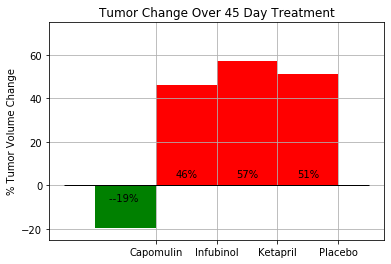

In [14]:
# Store all Relevant Percent Changes into a Tuple
relevant_percent_changes = (percent_change["Capomulin"], 
               percent_change["Infubinol"], 
               percent_change["Ketapril"], 
               percent_change["Placebo"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(relevant_percent_changes))  
width = 1
rectsPass = ax.bar(ind[0], relevant_percent_changes[0], width, color='green')
rectsFail = ax.bar(ind[1:], relevant_percent_changes[1:], width, color='red')

# Orient widths. Add labels, tick marks, etc. 
ax.set_title('Tumor Change Over 45 Day Treatment')

ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))

ax.set_ylabel('% Tumor Volume Change')
ax.set_ylim([-25,75])

ax.set_autoscaley_on(False)
ax.grid(True)
plt.hlines(0, -1, len(ind), alpha=1.0, linewidth=1.0)

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="black")

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="black")


# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Save the Figure
fig.savefig("../Figure 4 Percent Change.png")

# Show the Figure
fig.show()